## Install dependencies

In [2]:
# Install torch dependencies: (use cu110 since colab has CUDA 11)
!pip install -U torch==1.7.0+cu110 torchvision==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1 MB 53.7 MB/s eta 0:00:06tcmalloc: large alloc 1147494400 bytes == 0x557a8a0ae000 @  0x7f17b031b615 0x557a5087e4cc 0x557a5095e47a 0x557a508812ed 0x557a50972e1d 0x557a508f4e99 0x557a508ef9ee 0x557a50882bda 0x557a508f4d00 0x557a508ef9ee 0x557a50882bda 0x557a508f1737 0x557a50973c66 0x557a508f0daf 0x557a50973c66 0x557a508f0daf 0x557a50973c66 0x557a508f0daf 0x557a50883039 0x557a508c6409 0x557a50881c52 0x557a508f4c25 0x557a508ef9ee 0x557a50882bda 0x557a508f1737 0x557a508ef9ee 0x557a50882bda 0x557a508f0915 0x557a50882afa 0x557a508f0c0d 0x557a508ef9ee
     |█████████████████████████████▊  | 1055.7 MB 1.5 MB/s eta 0:00:54tcmalloc: large alloc 1434370048 bytes == 0x557ace704000 @  0x7f17b031b615 0x557a5087e4cc 0x557a5095e47a 0x557a508812ed 0x557a50972e1d 0x557a508f4e99 0x557a508ef9ee 0x557a50882bda 0x557a508f4d00 0x557a508ef9ee 0x557a50882bda 0x557a508f1737 0x557a50973c66 0x557a508f0

In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

%cd /mmocr/
!ls

1.7.0+cu110 True
2.18.1
1.3.17
11.1
GCC 7.5
0.3.0
[Errno 2] No such file or directory: '/mmocr/'
/content/mmocr
CITATION.cff  docs	   mmocr	    README_zh-CN.md   setup.cfg
configs       docs_zh_CN   mmocr.egg-info   requirements      setup.py
demo	      LICENSE	   model-index.yml  requirements.txt  tests
docker	      MANIFEST.in  README.md	    resources	      tools


## Demo 

In [4]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det=None, recog='SAR')
mmocr.readtext('demo/demo_text_recog.jpg', print_result=True, output='outputs/demo_text_recog_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


Downloading: "https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth" to /root/.cache/torch/hub/checkpoints/sar_r31_parallel_decoder_academic-dba3a4a3.pth


  0%|          | 0.00/219M [00:00<?, ?B/s]

/content/mmocr/mmocr/apis/inference.py:48: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


{'text': 'STAR', 'score': 0.9664110243320465}



[{'score': 0.9664110243320465, 'text': 'STAR'}]

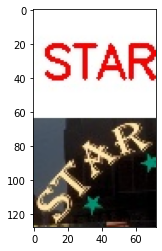

In [5]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_recog_pred.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()